<a href="https://colab.research.google.com/github/FranciscoFoz/Bibliotecario_em_Ciencia_de_Dados/blob/main/Bibliotecario_Ciencia_de_Dados_Visualizacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Autor: [Francisco Foz](https://www.linkedin.com/in/francisco-tadeu-foz/)

# <font color = lightblue> Visualizando Dados


Este notebook segue fazendo parte do projeto iniciado por mim, Francisco Foz, integrante do time Alura Stars. Com o objetivo de auxiliar na disseminação da informação em Ciência de Dados para a área da Biblioteconomia. Utilizando do livro "Data Science do zero" de Joel Grus. Abordarei alguns conceitos básicos de visualização de dados.

## Conjunto de dados
Para esse projeto utilizarei o conjunto de dados da Biblioteca da Universidade Federal do Rio Grande do Norte - UFRN, do 1º semestre de 2019, localizado no [Portal Brasileiro de Dados Abertos.](https://dados.gov.br/dataset/emprestimos-acervos-das-bibliotecas)



In [ ]:
#Importando o pandas
import pandas as pd


In [ ]:
#Lendo o arquivo csv
emprestimos = pd.read_csv('emprestimos-20191.csv', sep= ';')
emprestimos.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,nome_usuario,tipo_vinculo_usuario
0,2782809,L169931,NaN,2019/01/02 08:09:52.211000000,2019/01/25 11:40:31.000000000,2.019101e+10,RAIMUNDO VICENTE PEREIRA NETO,ALUNO DE PÓS-GRADUAÇÃO
1,2782810,L099542,NaN,2019/01/02 08:09:52.286000000,2019/01/03 18:29:29.000000000,2.019101e+10,RAIMUNDO VICENTE PEREIRA NETO,ALUNO DE PÓS-GRADUAÇÃO
2,2782811,L199924,NaN,2019/01/02 08:09:52.321000000,2019/01/25 11:40:25.000000000,2.019101e+10,RAIMUNDO VICENTE PEREIRA NETO,ALUNO DE PÓS-GRADUAÇÃO
3,2782812,2010081229,2019/01/17 06:20:06.044000000,2019/01/02 08:30:25.722000000,2019/01/28 08:22:55.000000000,2.018014e+10,DAVID DANIEL LIMA DE SOUZA,ALUNO DE GRADUAÇÃO
4,2782813,2018022572,2019/01/17 06:20:06.019000000,2019/01/02 08:30:25.758000000,2019/01/28 08:22:42.000000000,2.018014e+10,DAVID DANIEL LIMA DE SOUZA,ALUNO DE GRADUAÇÃO


In [ ]:
#Excluindo coluna de nome usuario
emprestimos.pop('nome_usuario')
emprestimos.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario
0,2782809,L169931,NaN,2019/01/02 08:09:52.211000000,2019/01/25 11:40:31.000000000,2.019101e+10,ALUNO DE PÓS-GRADUAÇÃO
1,2782810,L099542,NaN,2019/01/02 08:09:52.286000000,2019/01/03 18:29:29.000000000,2.019101e+10,ALUNO DE PÓS-GRADUAÇÃO
2,2782811,L199924,NaN,2019/01/02 08:09:52.321000000,2019/01/25 11:40:25.000000000,2.019101e+10,ALUNO DE PÓS-GRADUAÇÃO
3,2782812,2010081229,2019/01/17 06:20:06.044000000,2019/01/02 08:30:25.722000000,2019/01/28 08:22:55.000000000,2.018014e+10,ALUNO DE GRADUAÇÃO
4,2782813,2018022572,2019/01/17 06:20:06.019000000,2019/01/02 08:30:25.758000000,2019/01/28 08:22:42.000000000,2.018014e+10,ALUNO DE GRADUAÇÃO


In [ ]:
#Modificando o tipo de dado da matricula para inteiro
emprestimos.matricula_ou_siape = emprestimos.matricula_ou_siape.astype('int64') #O código gerará um erro, pois há valores NA

ValueError: ignored

In [ ]:
#Preenchendo com 0 aonde possui NA
emprestimos.matricula_ou_siape = emprestimos.matricula_ou_siape.fillna(0)

In [ ]:
emprestimos.matricula_ou_siape = emprestimos.matricula_ou_siape.astype('int64')
emprestimos.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario
0,2782809,L169931,NaN,2019/01/02 08:09:52.211000000,2019/01/25 11:40:31.000000000,20191005377,ALUNO DE PÓS-GRADUAÇÃO
1,2782810,L099542,NaN,2019/01/02 08:09:52.286000000,2019/01/03 18:29:29.000000000,20191005377,ALUNO DE PÓS-GRADUAÇÃO
2,2782811,L199924,NaN,2019/01/02 08:09:52.321000000,2019/01/25 11:40:25.000000000,20191005377,ALUNO DE PÓS-GRADUAÇÃO
3,2782812,2010081229,2019/01/17 06:20:06.044000000,2019/01/02 08:30:25.722000000,2019/01/28 08:22:55.000000000,20180140444,ALUNO DE GRADUAÇÃO
4,2782813,2018022572,2019/01/17 06:20:06.019000000,2019/01/02 08:30:25.758000000,2019/01/28 08:22:42.000000000,20180140444,ALUNO DE GRADUAÇÃO


## Gráfico de Barra

In [ ]:
#Contando a frequência de empréstimos por tipos de usuários
freq_tipos_usuarios = emprestimos.tipo_vinculo_usuario.value_counts(ascending = True)
freq_tipos_usuarios



USUÁRIO EXTERNO                       82
ALUNO MÉDIO/TÉCNICO                 1474
SERVIDOR TÉCNICO-ADMINISTRATIVO     1693
DOCENTE EXTERNO                     2287
DOCENTE                             3749
ALUNO DE PÓS-GRADUAÇÃO             14907
ALUNO DE GRADUAÇÃO                 71647
Name: tipo_vinculo_usuario, dtype: int64

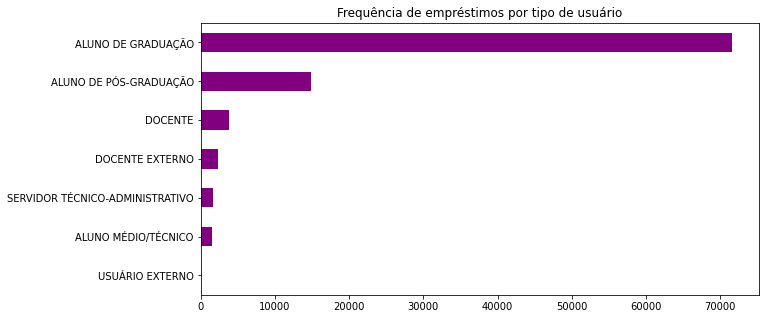

In [ ]:
#Criando um gráfico de barras 
freq_tipos_usuarios.plot.barh(
    y= freq_tipos_usuarios,
    title = 'Frequência de empréstimos por tipo de usuário', #Acrescentando título
    figsize = (10,5), #Modificando o tamanho do gráfico
    color = 'purple', #Modificando a cor do gráfico
    
)

In [ ]:
#Percentual de empréstimos por tipos de usuários
perc_freq_tipos_usuarios = emprestimos.tipo_vinculo_usuario.value_counts(ascending = True, normalize= True)
round(perc_freq_tipos_usuarios * 100, 2)

USUÁRIO EXTERNO                     0.09
ALUNO MÉDIO/TÉCNICO                 1.54
SERVIDOR TÉCNICO-ADMINISTRATIVO     1.77
DOCENTE EXTERNO                     2.39
DOCENTE                             3.91
ALUNO DE PÓS-GRADUAÇÃO             15.55
ALUNO DE GRADUAÇÃO                 74.76
Name: tipo_vinculo_usuario, dtype: float64

##Gráfico de Linha

In [ ]:
emprestimos.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario
0,2782809,L169931,NaN,2019/01/02 08:09:52.211000000,2019/01/25 11:40:31.000000000,20191005377,ALUNO DE PÓS-GRADUAÇÃO
1,2782810,L099542,NaN,2019/01/02 08:09:52.286000000,2019/01/03 18:29:29.000000000,20191005377,ALUNO DE PÓS-GRADUAÇÃO
2,2782811,L199924,NaN,2019/01/02 08:09:52.321000000,2019/01/25 11:40:25.000000000,20191005377,ALUNO DE PÓS-GRADUAÇÃO
3,2782812,2010081229,2019/01/17 06:20:06.044000000,2019/01/02 08:30:25.722000000,2019/01/28 08:22:55.000000000,20180140444,ALUNO DE GRADUAÇÃO
4,2782813,2018022572,2019/01/17 06:20:06.019000000,2019/01/02 08:30:25.758000000,2019/01/28 08:22:42.000000000,20180140444,ALUNO DE GRADUAÇÃO


In [ ]:
emprestimos['data_emprestimo']

0        2019/01/02 08:09:52.211000000
1        2019/01/02 08:09:52.286000000
2        2019/01/02 08:09:52.321000000
3        2019/01/02 08:30:25.722000000
4        2019/01/02 08:30:25.758000000
                     ...              
95834    2019/06/28 20:57:00.438000000
95835    2019/06/28 20:57:00.461000000
95836    2019/06/28 20:57:51.874000000
95837    2019/06/28 20:59:48.447000000
95838    2019/06/28 21:06:48.436000000
Name: data_emprestimo, Length: 95839, dtype: object

In [ ]:
#Transformando a serie 'data_emprestimo' em formato datetime
emprestimos['data_emprestimo'] = pd.to_datetime(emprestimos['data_emprestimo'])

In [ ]:
emprestimos['data_emprestimo']

0       2019-01-02 08:09:52.211
1       2019-01-02 08:09:52.286
2       2019-01-02 08:09:52.321
3       2019-01-02 08:30:25.722
4       2019-01-02 08:30:25.758
                  ...          
95834   2019-06-28 20:57:00.438
95835   2019-06-28 20:57:00.461
95836   2019-06-28 20:57:51.874
95837   2019-06-28 20:59:48.447
95838   2019-06-28 21:06:48.436
Name: data_emprestimo, Length: 95839, dtype: datetime64[ns]

In [ ]:
#Criando a coluna com o número do mês referente
emprestimos['mes_emprestimo'] = emprestimos['data_emprestimo'].dt.month

In [ ]:
#Frequencia de emprestimos por mês
freq_mes_emprestimo = emprestimos.mes_emprestimo.value_counts()
freq_mes_emprestimo = freq_mes_emprestimo.reset_index() #resetando o índice para usar a coluna de número de meses
freq_mes_emprestimo = freq_mes_emprestimo.rename(columns={'index': 'mes', 'mes_emprestimo': 'emprestimos'}) #modificando o nome da coluna para mes
freq_mes_emprestimo


,mes,emprestimos
0,2,22043
1,3,20768
2,4,19265
3,5,17529
4,6,11421
5,1,4813


In [ ]:
#Reordenando pelo numero do mês
freq_mes_emprestimo = freq_mes_emprestimo.sort_values(by=['mes'])
freq_mes_emprestimo

,mes,emprestimos
5,1,4813
0,2,22043
1,3,20768
2,4,19265
3,5,17529
4,6,11421


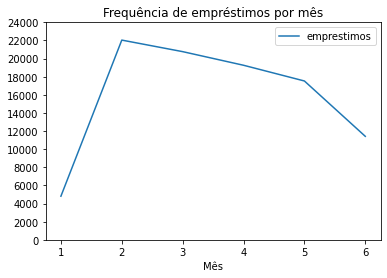

In [ ]:
freq_mes_emprestimo.plot.line(
    x = 'mes',                                   #Condigurando o dado no eixo x
    y = 'emprestimos',                           #Configurando o dado no eixo y
    yticks = range(0,26000,2000),                #Modificando a escala do eixo y
    xlabel = 'Mês',                              #Acrescentando o rótulo no eixo x
    title = 'Frequência de empréstimos por mês' #Acrescentando título
)

##Gráfico Histograma

In [ ]:
emprestimos.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,mes_emprestimo
0,2782809,L169931,NaN,2019-01-02 08:09:52.211,2019/01/25 11:40:31.000000000,20191005377,ALUNO DE PÓS-GRADUAÇÃO,1
1,2782810,L099542,NaN,2019-01-02 08:09:52.286,2019/01/03 18:29:29.000000000,20191005377,ALUNO DE PÓS-GRADUAÇÃO,1
2,2782811,L199924,NaN,2019-01-02 08:09:52.321,2019/01/25 11:40:25.000000000,20191005377,ALUNO DE PÓS-GRADUAÇÃO,1
3,2782812,2010081229,2019/01/17 06:20:06.044000000,2019-01-02 08:30:25.722,2019/01/28 08:22:55.000000000,20180140444,ALUNO DE GRADUAÇÃO,1
4,2782813,2018022572,2019/01/17 06:20:06.019000000,2019-01-02 08:30:25.758,2019/01/28 08:22:42.000000000,20180140444,ALUNO DE GRADUAÇÃO,1


In [ ]:
emprestimos = emprestimos[['tipo_vinculo_usuario','mes_emprestimo']]

In [ ]:
#Construindo dataframes para cada tipo de vinculo de usuario
tabela_aluno_pos = emprestimos.query('tipo_vinculo_usuario == "ALUNO DE PÓS-GRADUAÇÃO"')[['tipo_vinculo_usuario','mes_emprestimo']]
tabela_aluno_graduacao = emprestimos.query('tipo_vinculo_usuario == "ALUNO DE GRADUAÇÃO"')[['tipo_vinculo_usuario','mes_emprestimo']]
tabela_docente = emprestimos.query('tipo_vinculo_usuario == "DOCENTE"')[['tipo_vinculo_usuario','mes_emprestimo']]
tabela_docente_externo = emprestimos.query('tipo_vinculo_usuario == "DOCENTE EXTERNO"')[['tipo_vinculo_usuario','mes_emprestimo']]
tabela_servidor_TA = emprestimos.query('tipo_vinculo_usuario == "SERVIDOR TÉCNICO-ADMINISTRATIVO"')[['tipo_vinculo_usuario','mes_emprestimo']]
tabela_aluno_mediotec = emprestimos.query('tipo_vinculo_usuario == "ALUNO MÉDIO/TÉCNICO"')[['tipo_vinculo_usuario','mes_emprestimo']]
tabela_usuarioext = emprestimos.query('tipo_vinculo_usuario == "USUÁRIO EXTERNO"')[['tipo_vinculo_usuario','mes_emprestimo']]

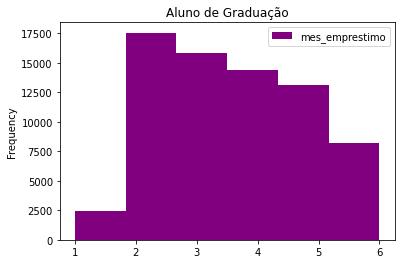

In [ ]:
tabela_aluno_graduacao.plot.hist(
    xticks = range (1,7),
    xlabel = 'Mês',
    bins = 6,
    color = 'purple',
    title = 'Aluno de Graduação')

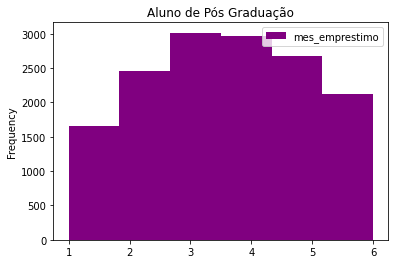

In [ ]:
tabela_aluno_pos.plot.hist(
    xticks = range (1,7),
    bins = 6,
    color = 'purple',
    title = 'Aluno de Pós Graduação')

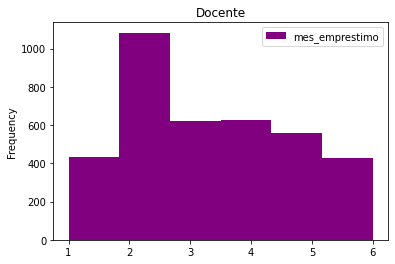

In [ ]:
tabela_docente.plot.hist(
    xticks = range (1,7),
    bins = 6,
    color = 'purple',
    title = 'Docente')

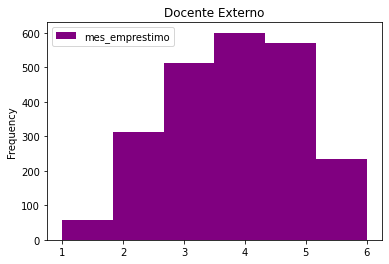

In [ ]:
tabela_docente_externo.plot.hist(
    xticks = range (1,7),
    bins = 6,
    color = 'purple',
    title = 'Docente Externo'
)

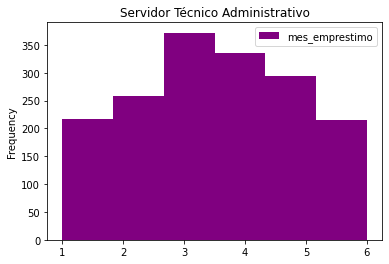

In [ ]:
tabela_servidor_TA.plot.hist(
    xticks = range (1,7),
    bins = 6,
    color = 'purple',
    title = 'Servidor Técnico Administrativo'
)

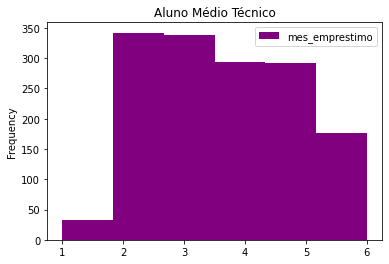

In [ ]:
tabela_aluno_mediotec.plot.hist(
    xticks = range (1,7),
    bins = 6,
    color = 'purple',
    title = 'Aluno Médio Técnico'
)

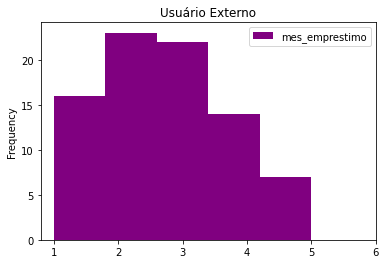

In [ ]:
#Usuarios externos
tabela_usuarioext.plot.hist(
    xticks = range (1,7),
    bins = 5,
    color = 'purple',
    title = 'Usuário Externo'
)